<a href="https://colab.research.google.com/github/UNT-CSCE-Projects/US_stock_market_prediction/blob/ml-farhan/Optiver_Trading_at_the_close.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Data import

In [2]:
import os.path
import json

api_token = {"username":"farhanarrafi","key":"61bc5393e4e8ca012a38d9d345c7362b"}

if not os.path.isdir('/root/.kaggle'):
  ! mkdir ~/.kaggle
  ! touch ~/.kaggle/kaggle.json
  with open('/root/.kaggle/kaggle.json', 'w') as file:
      json.dump(api_token, file)
  !chmod 600 ~/.kaggle/kaggle.json

In [3]:

if not os.path.isfile('train.csv'):
  ! kaggle competitions download -c 'optiver-trading-at-the-close'
  ! unzip optiver-trading-at-the-close.zip
  ! rm -rf optiver-trading-at-the-close.zip

 99% 198M/201M [00:03<00:00, 45.3MB/s]
100% 201M/201M [00:03<00:00, 53.7MB/s]
Archive:  optiver-trading-at-the-close.zip
  inflating: example_test_files/revealed_targets.csv  
  inflating: example_test_files/sample_submission.csv  
  inflating: example_test_files/test.csv  
  inflating: optiver2023/__init__.py  
  inflating: optiver2023/competition.cpython-310-x86_64-linux-gnu.so  
  inflating: public_timeseries_testing_util.py  
  inflating: train.csv               


In [4]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
train_dataset = pd.read_csv('train.csv')
train_dataset_row_17 = train_dataset[train_dataset['stock_id'] == 17]
train_dataset_row_17.head(10)

# Data Preprocessing

In [7]:
train = train_dataset_row_17.drop(axis='columns', columns=['stock_id', 'date_id','seconds_in_bucket','imbalance_size','imbalance_buy_sell_flag', 'reference_price','matched_size','far_price', 'near_price','bid_price','bid_size','ask_price','ask_size','wap','row_id'])
train = train.set_index('time_id')

,target
time_id,
0,-3.589988
1,-13.880134
2,-16.229748
3,-11.889935
4,-15.770197


In [8]:
standard_deviation = train['target'].std()
standard_deviation

8.592792472682557

In [9]:
mean = train['target'].mean()
mean

0.06302402054991493

In [10]:
max = train['target'].max()
max

81.29001

In [11]:
min = train['target'].min()

<Axes: >

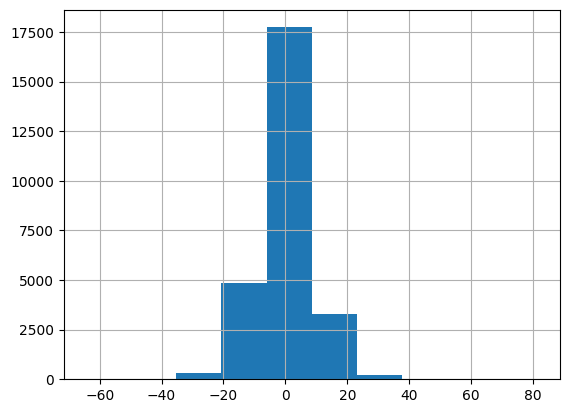

In [12]:

train['target'].hist()

In [13]:
# train_with_positive_outlier = train[train['target'] >= (mean + standard_deviation*3)]
# train_with_negative_outlier = train[train['target'] <= (mean + standard_deviation*3)]
# train_without_outlier = train - train_with_positive_outlier
# train_without_outlier = train - train_with_negative_outlier
# train_without_outlier['target'].hist()

In [14]:
train.tail(5)

,target
time_id,
26450,2.239943
26451,0.519752
26452,3.570318
26453,5.029440
26454,-2.920031


# Visualisation

<Axes: title={'center': 'Plot of target value of Stock 17 for the first 1 minute'}, xlabel='Time in 10 seconds interval', ylabel='Target value of stock'>

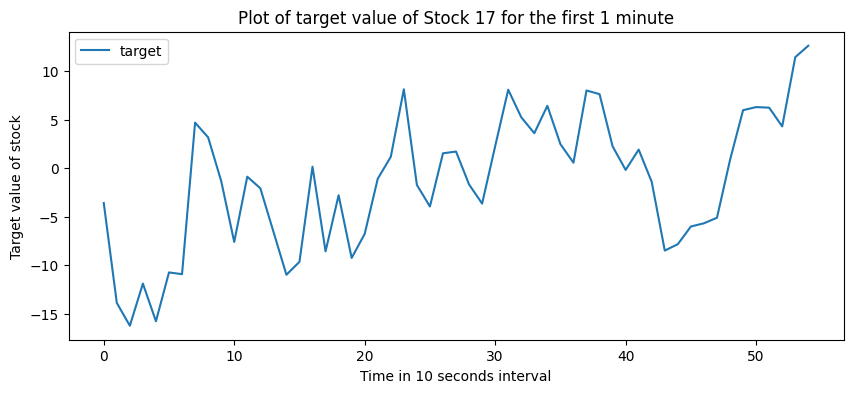

In [15]:
start = 0 # start of day 1
end = 55 # end of day 1 -> 6(one reading each 10 seconds) * 9 minutes

train[0:55].plot(xlabel='Time in 10 seconds interval', ylabel='Target value of stock', figsize=(10,4), title='Plot of target value of Stock 17 for the first 1 minute')

# Trend Extracting (Moving Average)

In [16]:
moving_average = train[start:end].rolling(window=5).mean()

<Axes: title={'center': 'Trend (Moving Average method) of Stock 17 for the first 1 day'}, xlabel='time_id'>

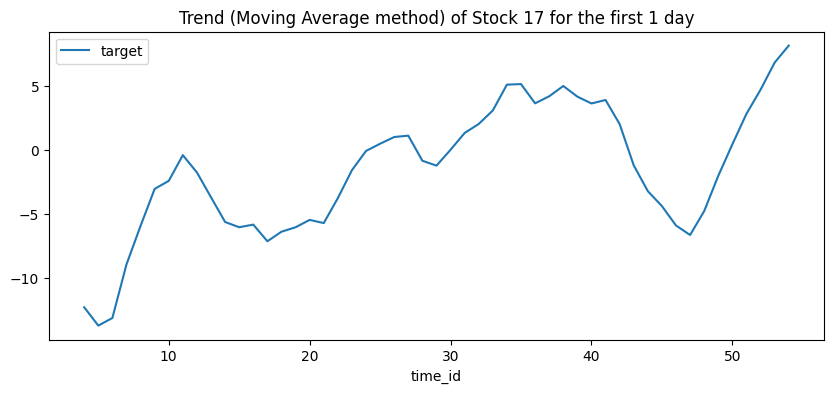

In [17]:
moving_average[start:end].plot(figsize=(10,4), title='Trend (Moving Average method) of Stock 17 for the first 1 day')

## Simple Moving Average

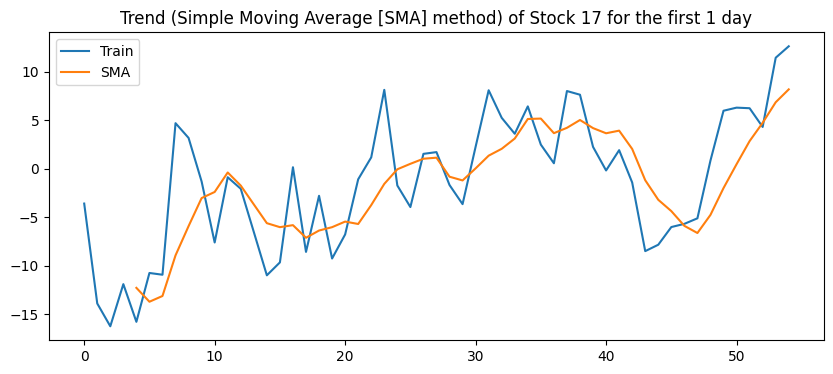

In [18]:
import matplotlib.pyplot as plt

start = 0 # start of day 1
end = 55 # end of day 1 -> 6(one reading each 10 seconds) * 9 minutes

y1 = train['target']
y2 = moving_average

plt.figure(figsize=(10,4))
plt.title('Trend (Simple Moving Average [SMA] method) of Stock 17 for the first 1 day')
plt.plot(y1[start:end], label='Train')
plt.plot(y2[start:end], label='SMA')
plt.legend()
plt.show()


## Weighted Moving Average

In [19]:
weights = [0.1,0.2,0.3,0.4]
weighted_moving_average = train['target'][start:end].rolling(4).apply(lambda x: sum(weights*x) / sum(weights), raw=True)

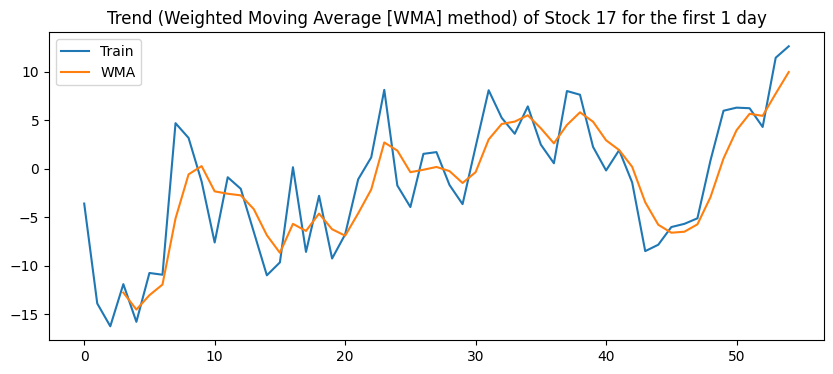

In [20]:
start = 0 # start of day 1
end = 55 # end of day 1 -> 6(one reading each 10 seconds) * 9 minutes

y1 = train['target']
y2 = weighted_moving_average


plt.figure(figsize=(10,4))
plt.title('Trend (Weighted Moving Average [WMA] method) of Stock 17 for the first 1 day')
plt.plot(y1[start:end], label='Train')
plt.plot(y2[start:end], label='WMA')
plt.legend()
plt.show()

In [22]:
# Exponential Smoothing (Exponential Moving Average)
exponential_smoothing_1 = train[start:end].ewm(span=4, adjust=False).mean()
exponential_smoothing_2 = exponential_smoothing_1.ewm(span=4, adjust=False).mean()
exponential_smoothing_3 = exponential_smoothing_2.ewm(span=4, adjust=False).mean()

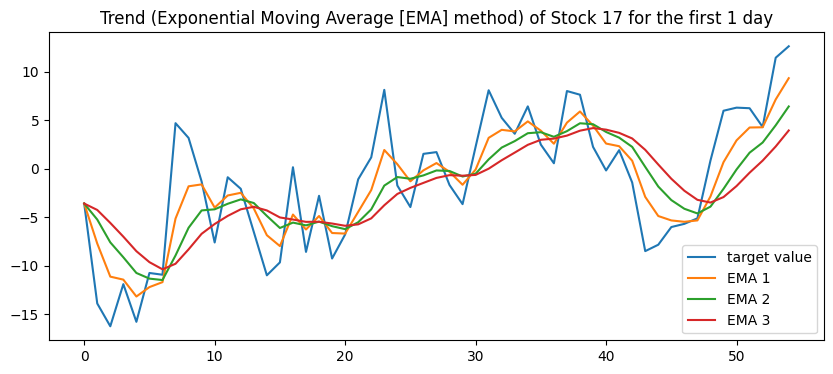

In [23]:
y1 = train
y2 = exponential_smoothing_1
y3 = exponential_smoothing_2
y4 = exponential_smoothing_3

start = 0
end = 55

plt.figure(figsize=(10,4))
plt.title('Trend (Exponential Moving Average [EMA] method) of Stock 17 for the first 1 day')
plt.plot(y1[start:end], label = 'target value')
plt.plot(y2[start:end], label='EMA 1')
plt.plot(y3[start:end], label='EMA 2')
plt.plot(y4[start:end], label='EMA 3')
plt.legend()
plt.show()

# De-Trending the time series

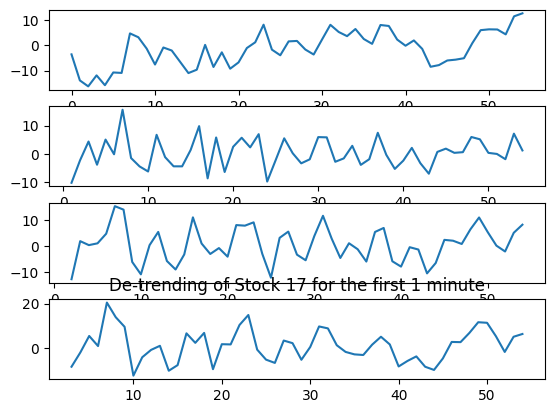

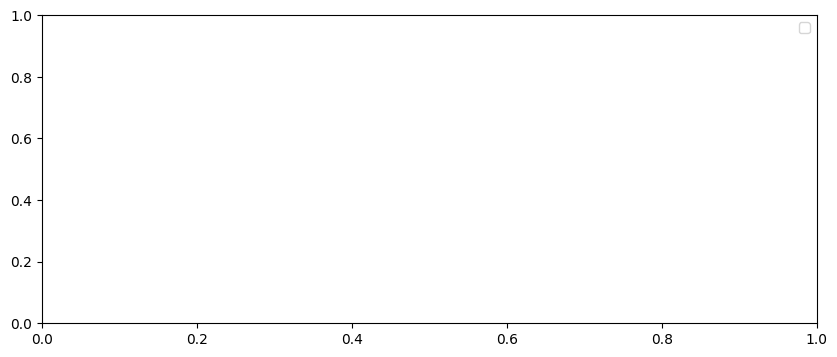

In [24]:
start = 0
end = 55

y1 = train[start:end]
y2 = train[start:end].diff(1)
y3 = train[start:end].diff(2)
y4 = train[start:end].diff(3)

fig, (ax1, ax2, ax3, ax4) = plt.subplots(4)
plt.title('De-trending of Stock 17 for the first 1 minute')
plt.figure(figsize=(10,4))

ax1.plot(y1[start:end], label='target value')
ax2.plot(y2[start:end], label='1 Differenced')
ax3.plot(y3[start:end], label='2 Differenced')
ax4.plot(y4[start:end], label='3 Differenced')
plt.legend()
# plt.show()

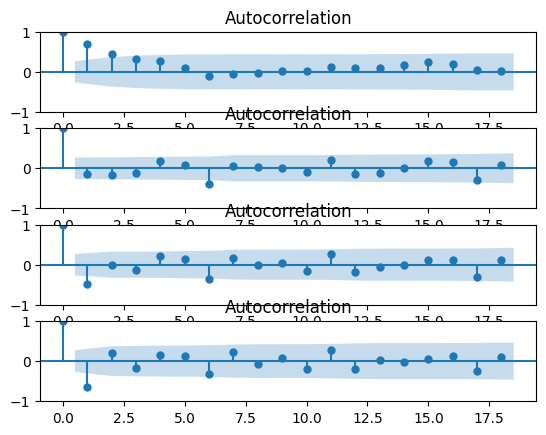

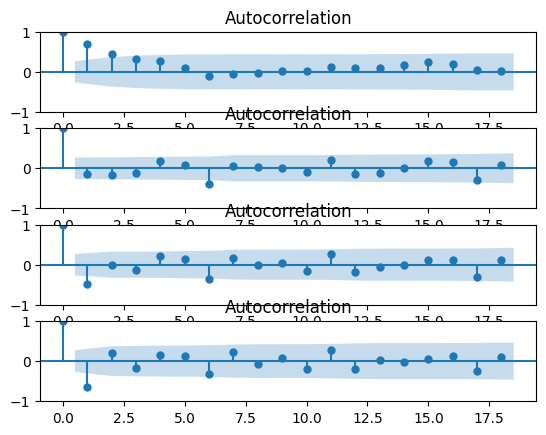

In [25]:
from statsmodels.graphics.tsaplots import plot_acf

fig, (ax1, ax2, ax3, ax4) = plt.subplots(4)
plot_acf(train[start:end], ax=ax1)
plot_acf(train[start:end].diff().dropna(), ax=ax2)
plot_acf(train[start:end].diff().diff().dropna(), ax=ax3)
plot_acf(train[start:end].diff().diff().diff().dropna(), ax=ax4)

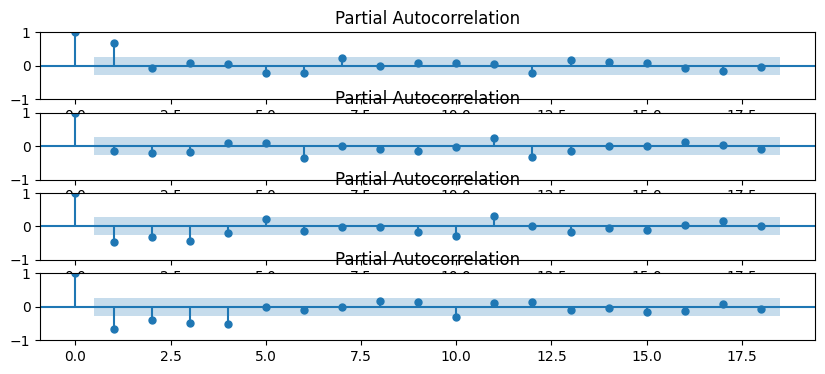

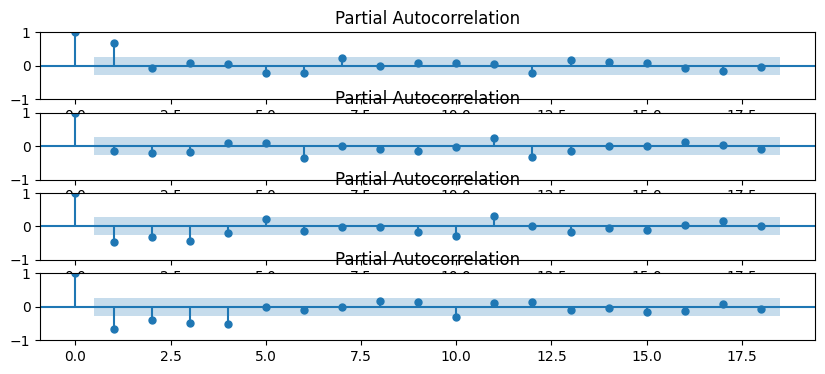

In [26]:
from statsmodels.graphics.tsaplots import plot_pacf


fig, (ax1, ax2, ax3, ax4) = plt.subplots(4, figsize=(10, 4))
plot_pacf(train[start:end], ax=ax1)
plot_pacf(train[start:end].diff().dropna(), ax=ax2)
plot_pacf(train[start:end].diff().diff().dropna(), ax=ax3)
plot_pacf(train[start:end].diff().diff().diff().dropna(), ax=ax4)

In [27]:
detrended_target1 = train - exponential_smoothing_1
detrended_target2 = train - exponential_smoothing_2
detrended_target3 = train - exponential_smoothing_3

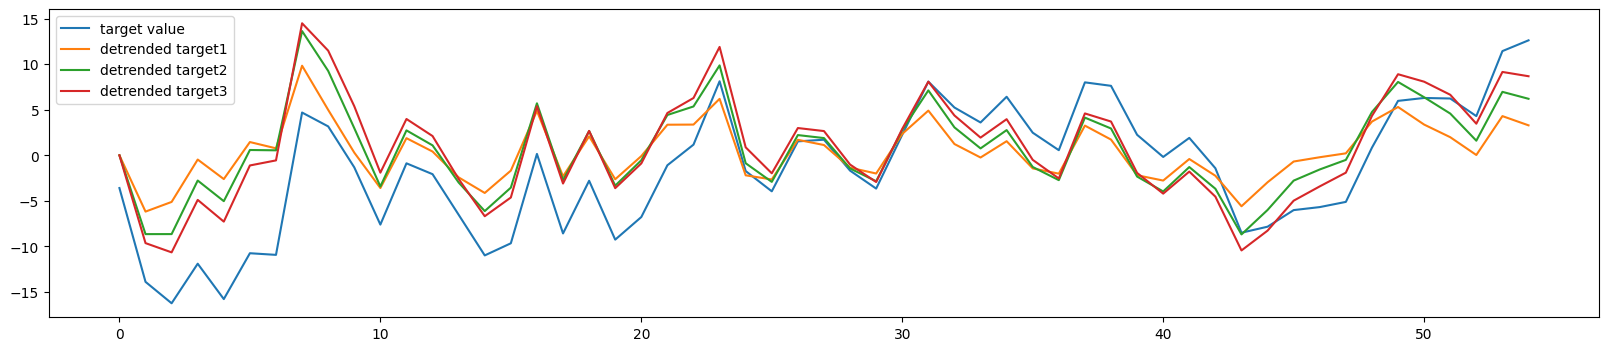

In [73]:

start = 0
end = 55

y1 = train
y2 = detrended_target1
y3 = detrended_target2
y4 = detrended_target3

plt.figure(figsize=(20,4))
plt.plot(y1[start:end], label='target value')
plt.plot(y2[start:end], label='detrended target1')
plt.plot(y3[start:end], label='detrended target2')
plt.plot(y4[start:end], label='detrended target3')
plt.legend()
plt.show()

# plt.figure(figsize=(20,4))
# plt.plot(x[541:1080],y2[541:1080], label='detrended target')
# plt.legend()
# plt.show()

# Testing for stationary

In [29]:
from statsmodels.tsa.stattools import adfuller

start = 0
end = 55

lag= 1
regression = 'c'

adfuller_es = adfuller(train[start:end], maxlag=lag, autolag=None, regression=regression)

# adfuller_es1 = adfuller(exponential_smoothing_1[start:end], maxlag=lag, autolag=None, regression=regression)
# adfuller_es2 = adfuller(exponential_smoothing_2[start:end], maxlag=lag, autolag=None, regression=regression)
# adfuller_es3 = adfuller(exponential_smoothing_3[start:end], maxlag=lag, autolag=None, regression=regression)

labels = ['ADF test statistics', 'P-value', '#Lags used', 'Number of observation used']

def parseAdfResult(adfResult):
  for value, label in zip(adfResult, labels):
    print(label+' : '+str(value))
  if adfResult[1] <= 0.05:
    print('Data is stationary')
  else:
    print('Data is non stationary.')

print(parseAdfResult(adfuller_es))

ADF test statistics : -2.492941277117412
P-value : 0.11720124847129576
#Lags used : 1
Number of observation used : 53
Data is non stationary.
None


# ADF and KPSS Test comparison
  Reference: https://www.statsmodels.org/dev/examples/notebooks/generated/stationarity_detrending_adf_kpss.html

In [30]:
def adf_test(timeseries):
    print("Results of Dickey-Fuller Test:")
    #dftest = adfuller(timeseries, autolag="AIC")
    dftest = adfuller(timeseries, maxlag=lag, autolag=None)
    dfoutput = pd.Series(
        dftest[0:4],
        index=[
            "Test Statistic",
            "p-value",
            "#Lags Used",
            "Number of Observations Used",
        ],
    )
    for key, value in dftest[4].items():
        dfoutput["Critical Value (%s)" % key] = value
    print(dfoutput)

print(adf_test(train[start:end]))
# print(adf_test(exponential_smoothing_1[start:end]))
# print(adf_test(exponential_smoothing_2[start:end]))
# print(adf_test(exponential_smoothing_3[start:end]))

Results of Dickey-Fuller Test:
Test Statistic                 -2.492941
p-value                         0.117201
#Lags Used                      1.000000
Number of Observations Used    53.000000
Critical Value (1%)            -3.560242
Critical Value (5%)            -2.917850
Critical Value (10%)           -2.596796
dtype: float64
None


In [31]:
from statsmodels.tsa.stattools import kpss

start = 0
end = 55

def kpss_test(timeseries):
    print("Results of KPSS Test:")
    kpsstest = kpss(timeseries, regression="c", nlags="auto")
    kpss_output = pd.Series(
        kpsstest[0:3], index=["Test Statistic", "p-value", "Lags Used"]
    )
    for key, value in kpsstest[3].items():
        kpss_output["Critical Value (%s)" % key] = value
    print(kpss_output)

print(kpss_test(train[start:end]))
# print(kpss_test(exponential_smoothing_1[start:end]))
# print(kpss_test(exponential_smoothing_2[start:end]))
# print(kpss_test(exponential_smoothing_3[start:end]))

Results of KPSS Test:
Test Statistic           0.635788
p-value                  0.019383
Lags Used                4.000000
Critical Value (10%)     0.347000
Critical Value (5%)      0.463000
Critical Value (2.5%)    0.574000
Critical Value (1%)      0.739000
dtype: float64
None


# Finding P, Q and D Values for ARIMA

https://analyticsindiamag.com/quick-way-to-find-p-d-and-q-values-for-arima/

## ACF for finding Q value

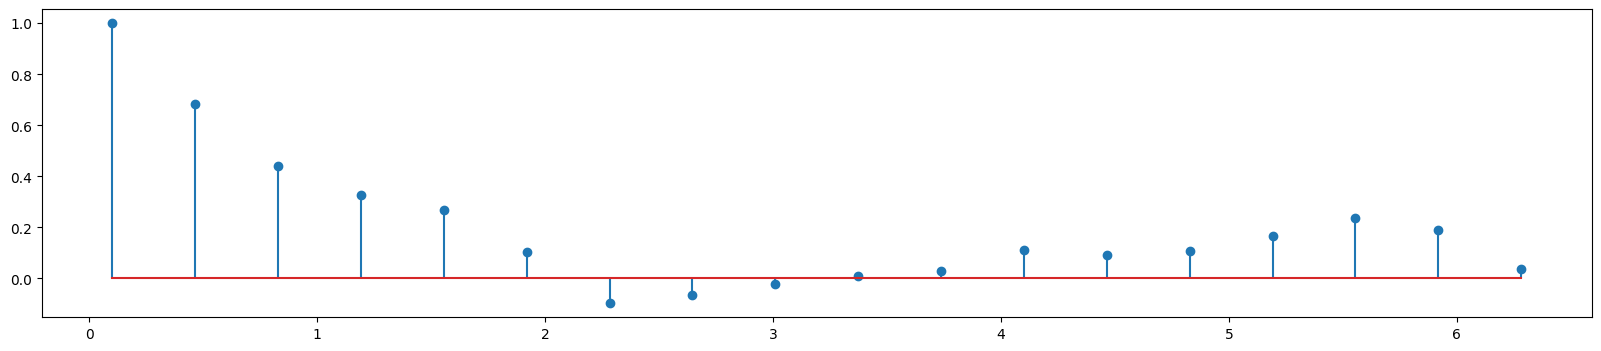

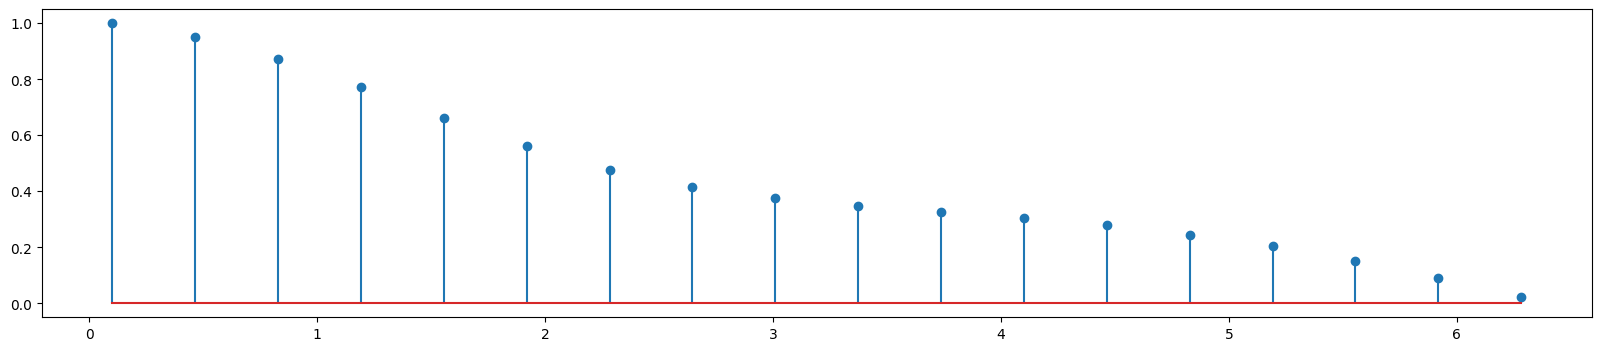

In [32]:
from statsmodels.tsa.stattools import acf

acf_train = acf(train[start:end])
acf_exp1 = acf(exponential_smoothing_3[start:end])

x = np.linspace(0.1, 2 * np.pi, len(acf_train))
y1 = acf_train
y2 = acf_exp1

plt.figure(figsize=(20,4))
plt.stem(x, y1)
plt.show()

plt.figure(figsize=(20,4))
plt.stem(x, y2)
plt.show()


## PACF for finding P value
We ignore lag 1.

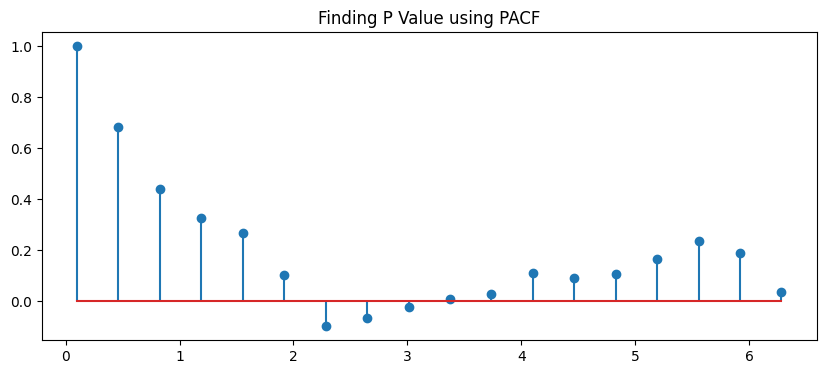

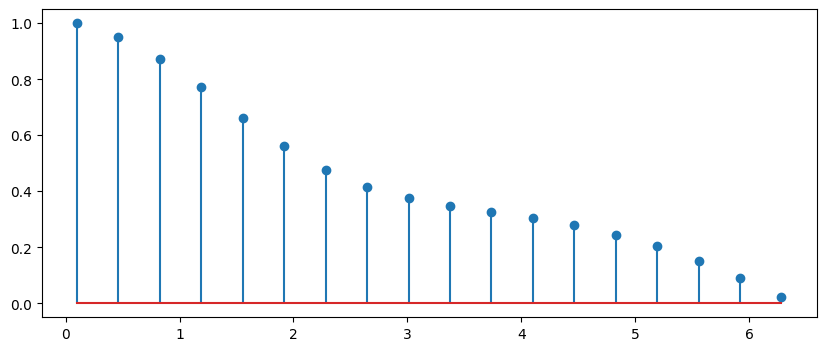

In [75]:
from statsmodels.tsa.stattools import pacf

pacf_train = acf(train[start:end])
pacf_exp1 = acf(exponential_smoothing_3[start:end])

x = np.linspace(0.1, 2 * np.pi, len(pacf_train))
y1 = pacf_train
y2 = pacf_exp1

plt.figure(figsize=(10,4))
plt.title('Finding P Value using PACF')
plt.stem(x, y1)
plt.show()

plt.figure(figsize=(10,4))
plt.stem(x, y2)
plt.show()

# ARIMA (Auto Regression Integrated Moving Average

In [76]:
from statsmodels.tsa.arima.model import ARIMA

start = 0
end = 55

arima_train = ARIMA(train[start:end], order=(4, 1, 5)).fit()
arima_exp1 = ARIMA(exponential_smoothing_3[start:end], order=(4, 1, 5)).fit()

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:60

In [77]:
# Error calculation

forecast = arima_train.predict(end-9, end-1, dynamic=True)
test = train[end-9: end]
# Compute the mean square error
mse = ((forecast.to_frame().predicted_mean - test.target) ** 2).mean()
print(mse)

forecast = arima_exp1.predict(end-9, end-1, dynamic=True)
test = train[end-9: end]
# Compute the mean square error
mse = ((forecast.to_frame().predicted_mean - test.target) ** 2).mean()
print(mse)

106.60452794961601
67.02534539733695


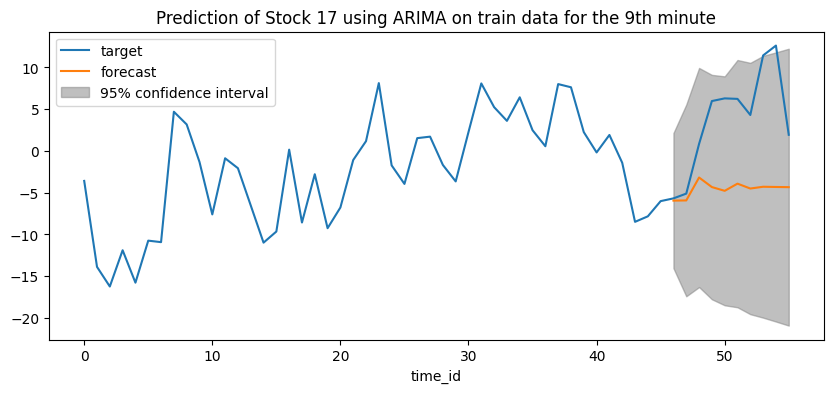

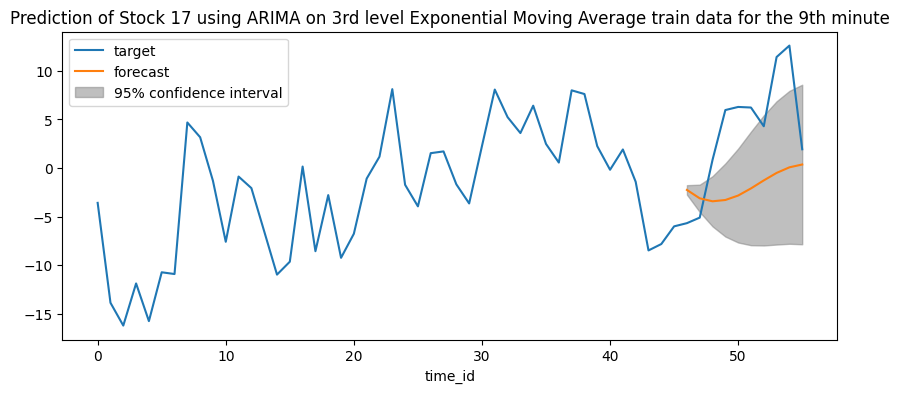

In [47]:
fig, ax = plt.subplots(figsize=(10, 4))
plt.title('Prediction of Stock 17 using ARIMA on train data for the 9th minute')
ax = train.loc[start:end].plot(ax=ax)
fig = plot_predict(arima_train, end-9, end, dynamic=True, ax=ax)
plt.show()

fig, ax = plt.subplots(figsize=(10, 4))
plt.title('Prediction of Stock 17 using ARIMA on 3rd level Exponential Moving Average train data for the 9th minute')
ax = train.loc[start:end].plot(ax=ax)
fig = plot_predict(arima_exp1, end-9, end, dynamic=True, ax=ax)
plt.show()

In [35]:
# print(arima_train.summary())
# print(arima_train.params)

In [36]:
# print(arima_exp1.summary())
# print(arima_exp1.params)

In [70]:
from statsmodels.graphics.tsaplots import plot_predict

start = 0
end = 55


arma_train = ARIMA(train[start:end-9], order=(1, 0, 1)).fit()
arma_exp_moving_avg = ARIMA(exponential_smoothing_3[start:end-9], order=(1, 0, 1)).fit()

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


In [71]:
# Error calculation

forecast = arma_train.predict(end-9, end-1, dynamic=True)
test = train[end-9: end]
# Compute the mean square error
mse = ((forecast.to_frame().predicted_mean - test.target) ** 2).mean()
print(mse)

forecast = arma_exp_moving_avg.predict(end-9, end-1, dynamic=True)
test = train[end-9: end]
# Compute the mean square error
mse = ((forecast.to_frame().predicted_mean - test.target) ** 2).mean()
print(mse)

84.98761764344754
72.9546779181021


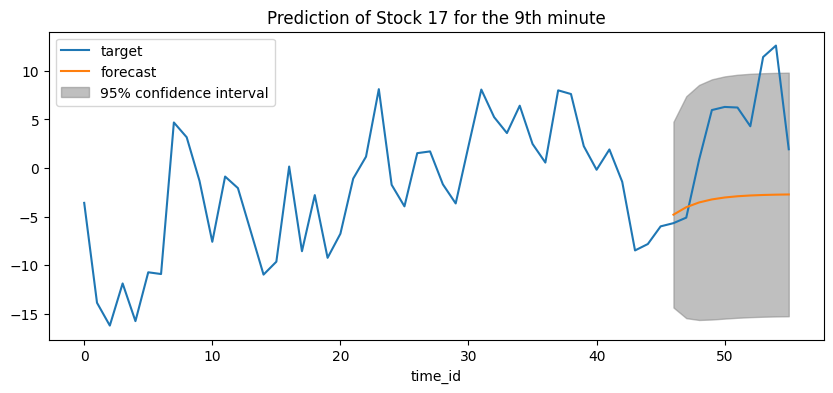

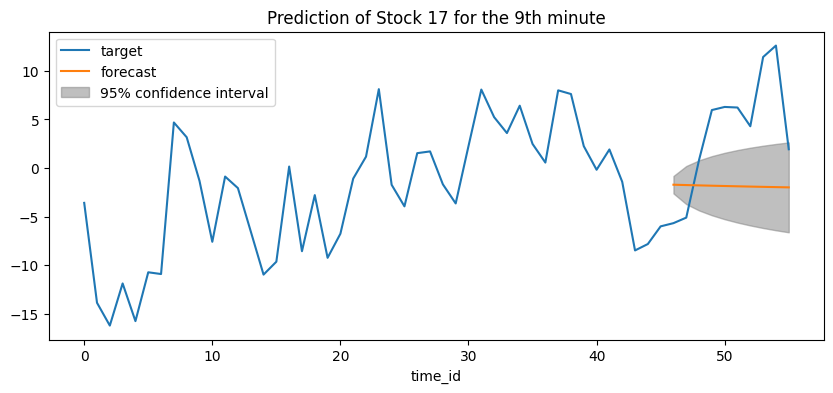

In [72]:

fig, ax = plt.subplots(figsize=(10, 4))
plt.title('Prediction of Stock 17 for the 9th minute')
ax = train.loc[start:end].plot(ax=ax)
fig = plot_predict(arma_train, end-9, end, dynamic=True, ax=ax)
plt.show()


fig, ax = plt.subplots(figsize=(10, 4))
plt.title('Prediction of Stock 17 for the 9th minute')
ax = train.loc[start:end].plot(ax=ax)
fig = plot_predict(arma_exp_moving_avg, end-9, end, dynamic=True, ax=ax)
plt.show()

# Testing

In [38]:
import optiver2023
env = optiver2023.make_env()
iter_test = env.iter_test()

# References:


1.   [Testing code source](https://www.kaggle.com/code/jirkaborovec/optiver-eda-pytorch-models)
2.   [Moving Average source](https://medium.com/@HalderNilimesh/applied-data-science-for-beginners-how-to-calculate-moving-average-using-pandas-dataframe-in-7e5f7944c07a)

